# Notebook to reproduce _Supplementary Figure 1_

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_1/'

In [3]:
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [4]:
def plot_EvoDevo_extrapolation_model_performance_summaries(metric):
    means = []
    stderrs = []
    df = pd.read_csv('results/EvoDevo/EvoDevo_model_performance:{}.csv'.format(metric))

    ax = plot_settings.get_wider_axis()
    model_ordering = plot_settings.get_model_ordering([mod for mod in plot_settings.EVO_DEVO_MODELS])
    colors = [plot_settings.get_model_colors(mod) for mod in model_ordering]
    labels = [plot_settings.get_model_name_conventions(mod) for mod in model_ordering]

    task_vals = []
    for model in model_ordering:
        row = df[df['model'] == model].iloc[0]
        task_vals.append((row['mean'], row['std dev'] / np.sqrt(48)))
    means.append([v[0] for v in task_vals])
    stderrs.append([v[1] for v in task_vals])

    plot_utils.grouped_barplot(
        ax, means, [''],
        xlabel='', ylabel=plot_settings.get_metric_name(metric), color_legend=labels,
        nested_color=colors, nested_errs=stderrs, tickloc_top=False, rotangle=45, anchorpoint='right',
        legend_loc='upper left' if metric == 'RMSE' else 'upper right',
        min_val=0.0 if 'time' not in metric else -0.2)

    plot_utils.format_ax(ax)
    plot_utils.format_legend(ax, *ax.get_legend_handles_labels(), loc='upper right', 
                             ncols=2)
    plot_utils.put_legend_outside_plot(ax, anchorage=(1.01, 1.01))

# Produce supplementary figure 1a-c

Supplementary Fig. 1a

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


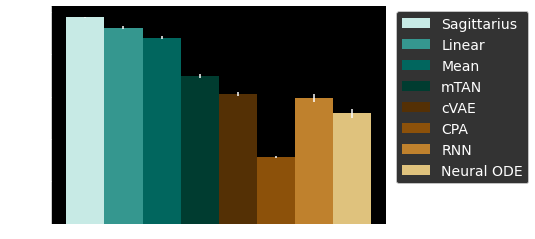

In [5]:
%matplotlib inline

plot_EvoDevo_extrapolation_model_performance_summaries('pearson_compare_genes')
plt.savefig(fig_dir + 'figure_1a.pdf')

Supplementary Fig. 1b

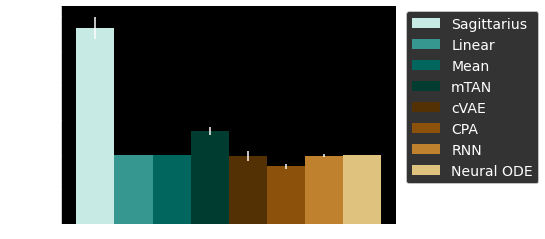

In [6]:
plot_EvoDevo_extrapolation_model_performance_summaries('pearson_compare_times')
plt.savefig(fig_dir + 'figure_1b.pdf')

Supplementary Fig. 1c

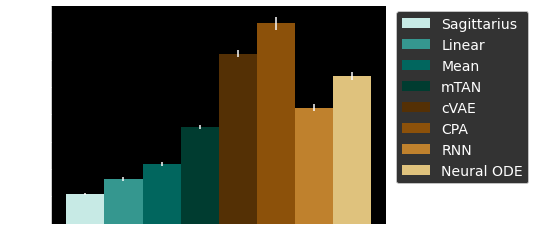

In [7]:
plot_EvoDevo_extrapolation_model_performance_summaries('RMSE')
plt.savefig(fig_dir + 'figure_1c.pdf')